# Naïve Bayes classifier using Python. 

In [1]:
#import required libs
import pandas as pd
import numpy as np

#import required libraries for plotting the graphs for visualization
import seaborn as sn
import matplotlib.pyplot as plt 

#instruction to show the output directly below the code cell that produced it.
%matplotlib inline

#ignore warnings for deprecations to get clean output
import warnings
warnings.filterwarnings('ignore')

#library to split the data into test & train
from sklearn.model_selection import train_test_split

#library to normalize the data using Z score 
from sklearn.preprocessing import StandardScaler



In [2]:
df=pd.read_csv('liver_disease_1.csv')

In [3]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [4]:
df.tail()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,No
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,Yes
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,Yes
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,Yes
582,38,1.0,0.3,216,21,24,7.3,4.4,1.50,No


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


# Correlation Check

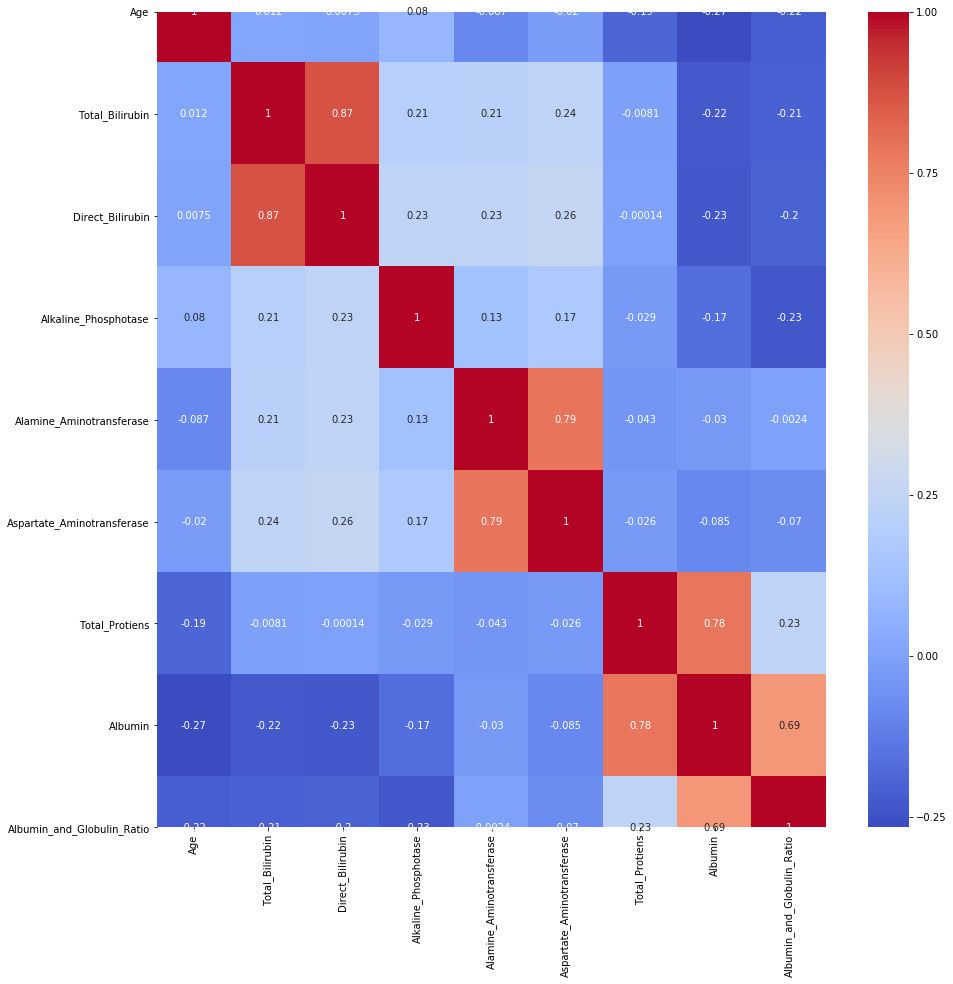

In [7]:
import seaborn as sns
#See the correlations between values

#Get the correalation matrix
corr_matrix = df.corr()

#index the correlated matrix
corr_matrix_index = corr_matrix.index

#Define the size of space to be plotted
plt.figure(figsize=(15,15))

#Draw the heat map 
sn.heatmap(df[corr_matrix_index].corr(),annot=True,cmap='coolwarm')

# Find the missing valus in the dataset

In [8]:
#Print the total given features
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [9]:
#Check the 0 values
print ("Total records in given dataset     : {0}".format(len(df)))
print ("Missing Age count                  : {0}".format(len(df.loc[df.Age == 0])))
print ("Missing Total_Bilirubin            : {0}".format(len(df.loc[df.Total_Bilirubin == 0])))
print ("Missing Direct_Bilirubin           : {0}".format(len(df.loc[df.Direct_Bilirubin == 0]))) 
print ("Missing Alkaline_Phosphotase       : {0}".format(len(df.loc[df.Alkaline_Phosphotase == 0])))
print ("Missing Alamine_Aminotransferase   : {0}".format(len(df.loc[df.Alamine_Aminotransferase == 0])))
print ("Missing Aspartate_Aminotransferase : {0}".format(len(df.loc[df.Aspartate_Aminotransferase == 0])))
print ("Missing Total_Protiens             : {0}".format(len(df.loc[df.Total_Protiens == 0])))
print ("Missing Albumin                    : {0}".format(len(df.loc[df.Albumin == 0])))
print ("Missing Albumin_and_Globulin_Ratio : {0}".format(len(df.loc[df.Albumin_and_Globulin_Ratio == 0])))
print ("Missing Output Value               : {0}".format(len(df.loc[df.Dataset == 0])))

Total records in given dataset     : 583
Missing Age count                  : 0
Missing Total_Bilirubin            : 0
Missing Direct_Bilirubin           : 0
Missing Alkaline_Phosphotase       : 0
Missing Alamine_Aminotransferase   : 0
Missing Aspartate_Aminotransferase : 0
Missing Total_Protiens             : 0
Missing Albumin                    : 0
Missing Albumin_and_Globulin_Ratio : 0
Missing Output Value               : 0


In [10]:
#Check for any null values in the dataset
df.isnull().values.any()

True

Inference : None of the given values are 0 but there few null values. Lets try to find the null values

# Find the Null values and fix them

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null object
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


Out of 583 total dataset, Albumin_and_Globulin_Ratio is having 579 rows. 4 are null values

In [12]:
#Another way to find the records having null values 
print ("Total Null records count for Albumin_and_Globulin_Ratio   : {0}".format(len(df.loc[df.Albumin_and_Globulin_Ratio.isnull()])))

Total Null records count for Albumin_and_Globulin_Ratio   : 4


In [13]:
#Lets find the records having Null values
df_null = df.loc[df.Albumin_and_Globulin_Ratio.isnull()]
print ("Total records : {0}".format(len(df_null)))
print (df_null)
       



Total records : 4
     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45              0.9               0.3                   189   
241   51              0.8               0.2                   230   
253   35              0.6               0.2                   180   
312   27              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio Dataset  
209      3.9                         NaN     Yes  
241      3.1                         NaN     Yes  
253      2.7                         NaN      No  
312      4.8                         NaN      

# Outlier Check

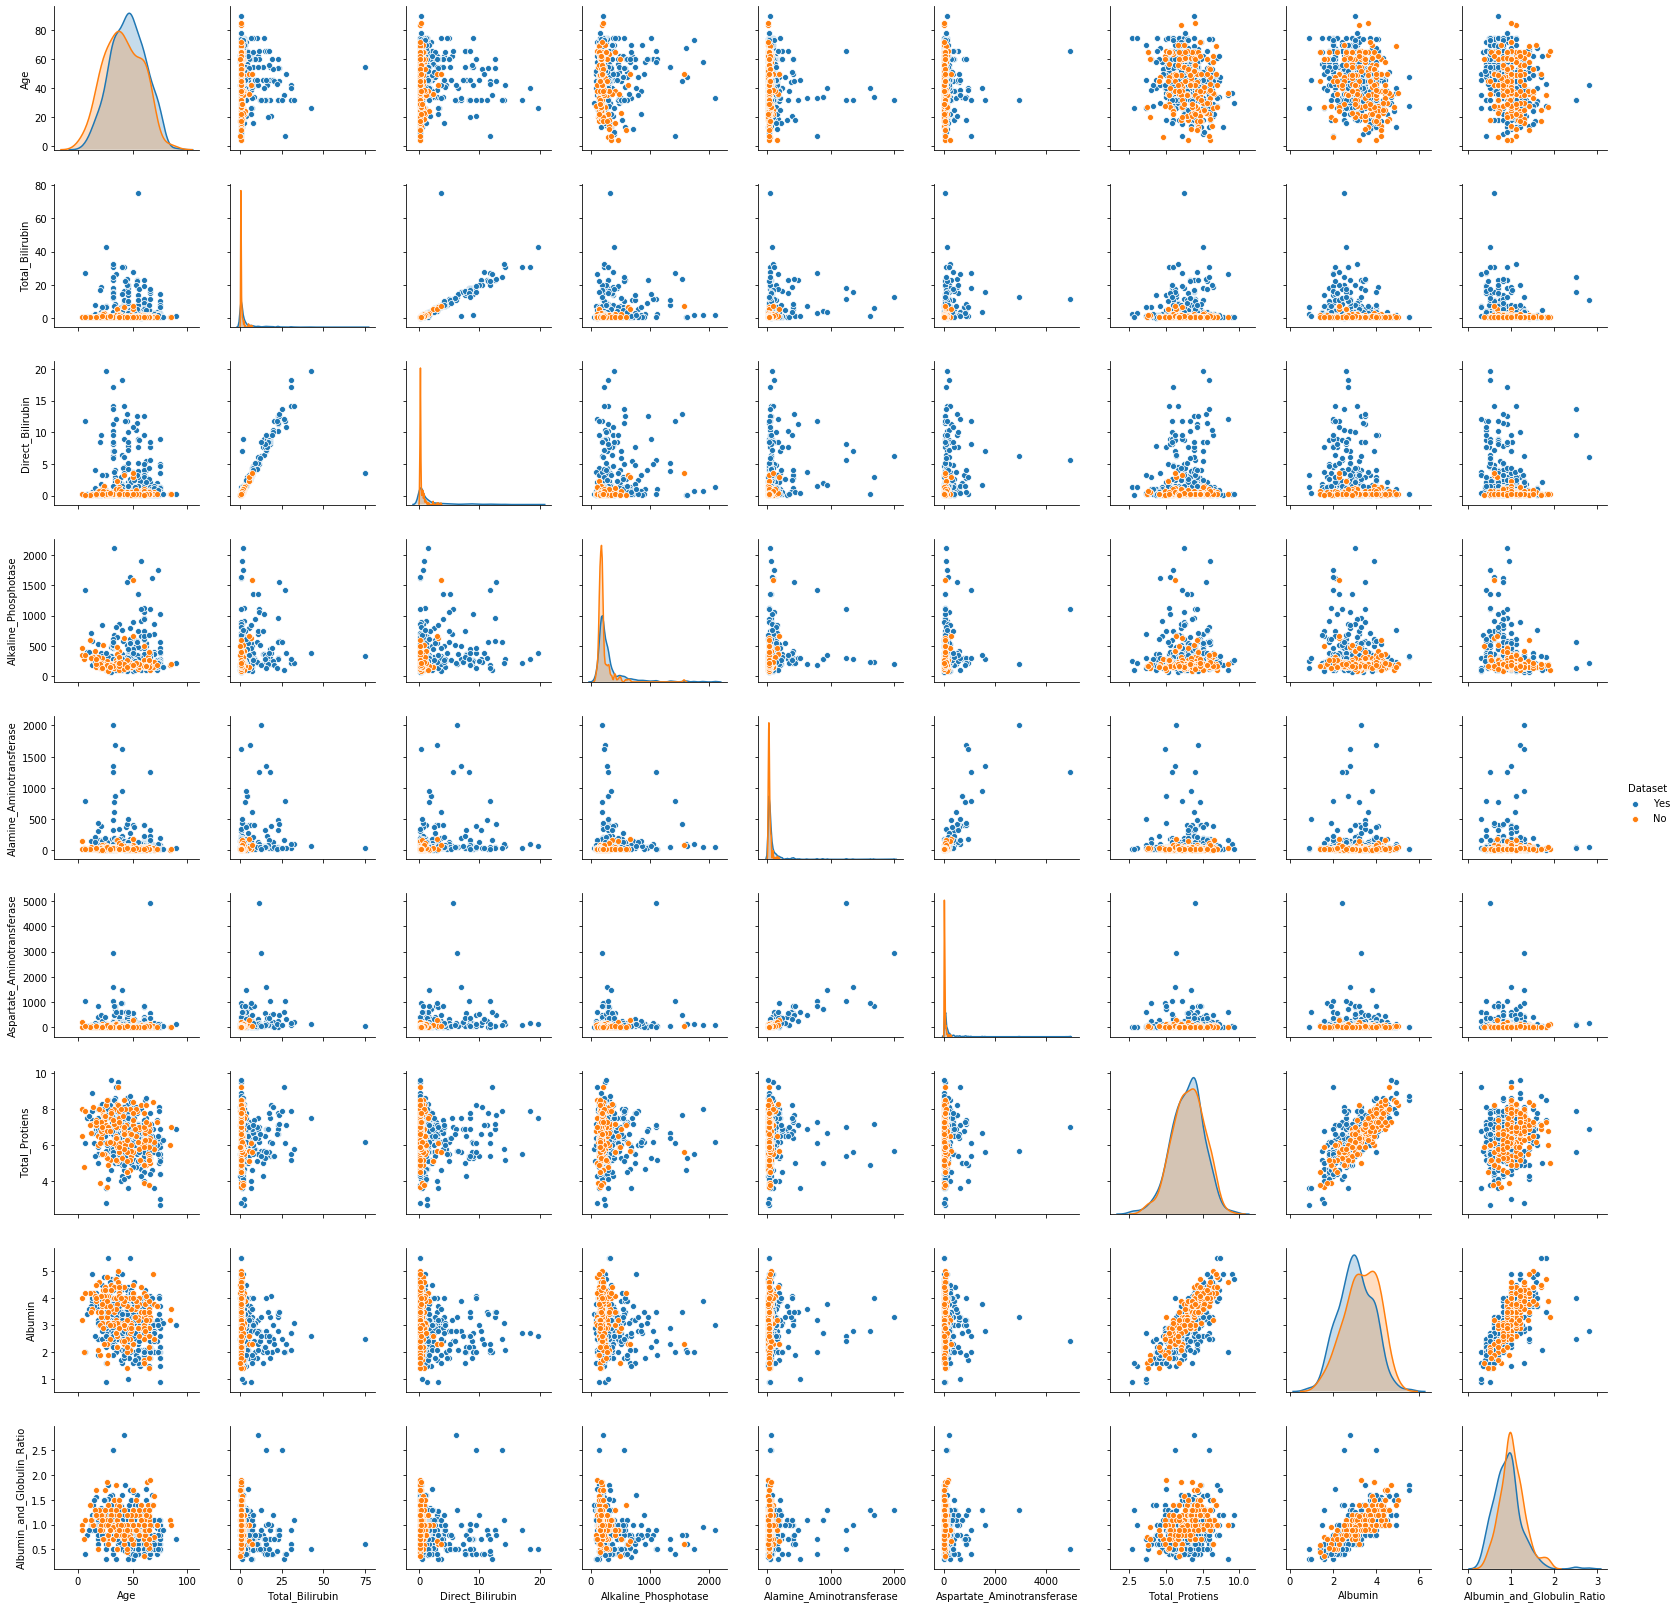

In [14]:
sns.pairplot(df, hue='Dataset', size=2.5)

# Dataset Distribution Check

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012FFFA46FC8>,
      dtype=object)

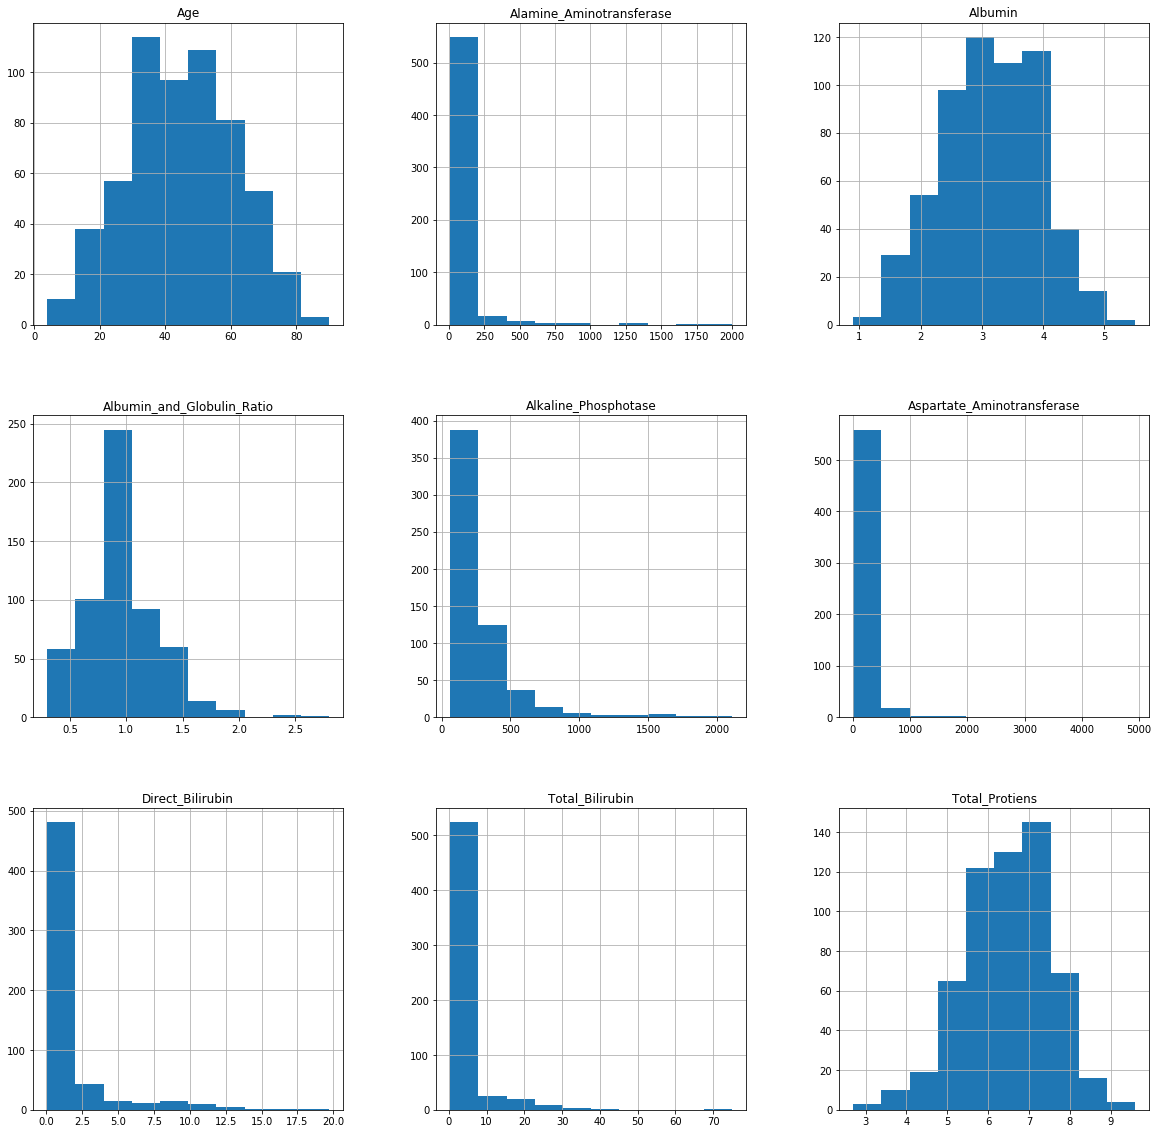

In [15]:
#Lets find out the distribtion of Albumin_and_Globulin_Ratio to decide between Mean, Median based on data distribution
df.hist(figsize = (20,20))


# Filling missing Values

In [16]:
#Albumin_and_Globulin_Ratio looks as a normal distribution so we will fill the null values with Mean
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace = True)

In [17]:
#Lets recheck the presence of null values
df.isnull().values.any()

False

Inference : Dataset is now clean from Null or 0 values. 

In [18]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

# Convert Catogorical to Numeric Values

In [19]:
#Remove categorical values to numerical value for target feature
#Replace yes as 1 and No as 0
df.loc[df.Dataset == 'Yes','Dataset'] = 1
df.loc[df.Dataset == 'No', 'Dataset'] = 0


In [20]:
idx_yes = df.loc[(df.Dataset == 'YES') | (df.Dataset == 'YES')]
idx_no  = df.loc[(df.Dataset == 'NO') | (df.Dataset == 'no')]
print ("Anything left for replacement Yes: ",idx_yes)
print ("Anything left for replacement No : ",idx_yes)


Anything left for replacement Yes:  Empty DataFrame
Columns: [Age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Dataset]
Index: []
Anything left for replacement No :  Empty DataFrame
Columns: [Age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase, Total_Protiens, Albumin, Albumin_and_Globulin_Ratio, Dataset]
Index: []


Inference : All Yes and No properly replaced with 1 and 0 respectively 

# Dataset Scaling

In [21]:
#Lets do the scaling of the given dataset & Spli the features & Labels
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Dataset"],axis = 1)),
                 columns=['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                          'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
                          'Total_Protiens','Albumin', 'Albumin_and_Globulin_Ratio'])
y = df.Dataset

In [22]:
df.head()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
#Split the data into Test and Train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42,stratify=y)

In [24]:
#import NB library 
from sklearn.naive_bayes import GaussianNB

# Model Creation

In [25]:
#Get the Gaussian Classifier
model = GaussianNB()

#Train the model using X_train, y_train training set
model.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = model.predict(X_test)

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6048780487804878


In [28]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [29]:
#Evaluate Results
cm=confusion_matrix(y_test,y_pred)
cm

array([[57,  2],
       [79, 67]], dtype=int64)

In [30]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,57,2,59
1,79,67,146
All,136,69,205


In [31]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.97      0.58        59
           1       0.97      0.46      0.62       146

    accuracy                           0.60       205
   macro avg       0.70      0.71      0.60       205
weighted avg       0.81      0.60      0.61       205



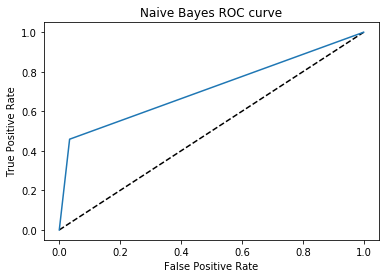

In [32]:
#Import libraries for ROC Curve
from sklearn.metrics import roc_curve

NB_y_test = y_test
NB_y_pred = y_pred
#Draw the ROC curve between test data and predcited target data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes sklearn module')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC curve')
plt.show()

# Implementing Naive Bayes Algorithm using manual Probability Calculations

In [33]:
# Quick repeation of data reading and data cleaning for Manual implementation
df=pd.read_csv('liver_disease_1.csv')

#Address Null values
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace = True)

#Replace Categorical with Numeric
df.loc[df.Dataset == 'Yes','Dataset'] = 1
df.loc[df.Dataset == 'No', 'Dataset'] = 0

df.head()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [34]:
#Since the given dataset is continous, defining labels to categorize values into low, medium and high
labels = ['low','medium','high']

#Traversing the dataset and converting into categorical values
for j in df.columns[:-1]:
    mean = df[j].mean()  
    df[j] = df[j].replace(0,mean) #Replacing any 0 value with its mean, if any
    df[j] = pd.cut(df[j],bins=len(labels),labels=labels) #Converting into 3 categories low, medium and high 


In [35]:
#Defining count function to count total number of target columns matching a given label
def count (data, colname, label, target):
    condition = ( (data[colname] == label) & (data['Dataset']==target) )
    return len(data[condition])

In [36]:
#Creating & initializing array for storing likelihood probabilities
probabilities = {0:{}, 1:{}}

#Percentage of dataset division
train_percent = 70

#Split the data into 70% as training data and 30% as test data
train_len = int((train_percent*len(df))/100)
train_X = df.iloc[:train_len,:]
test_X = df.iloc[train_len+1:,:-1]
test_y = df.iloc[train_len+1:,-1]

#Count the total number of 0 (No) and 1 (yes)
count_0 = count(train_X,'Dataset',0,0)
count_1 = count(train_X,'Dataset',1,1)


#Calculate Prior Probability 
prob_0 = count_0/len(X_train)
prob_1 = count_1/len(X_train)


#Calculate Likelihood 
for col in train_X.columns[:-1]:
    probabilities[0][col] = {}
    probabilities[1][col] = {}
    
    #Traverse for all 3 categories defined and get the counts     
    for category in labels:
        count_ct_0 = count(train_X,col,category,0)
        count_ct_1 = count(train_X,col,category,1)
                
        # Get the probabilitiy of occurance as well
        probabilities[0][col][category] = count_ct_0/count_0
        probabilities[1][col][category] = count_ct_1/count_1


In [37]:
#Predict the probability for given test data 
predict = []
for row in range (0,len(test_X)):
    prod_0 = prob_0
    prod_1 = prob_1
    for feature in test_X.columns:
        prod_0 *= probabilities[0][feature][test_X[feature].iloc[row]]
        prod_1 *= probabilities[1][feature][test_X[feature].iloc[row]]
        
    if prod_0 > prod_1:
        predict.append(0)
    else:
        predict.append(1)

In [38]:
#Test the results with actual test data and calculate accuracy 
#initialize tp(true positive), tn (true negative), fp(false positive), fn(false negative) variables as 0
tp,tn,fp,fn = 0,0,0,0

#For calculated prediction, compare with actual test results 
for j in range (0,len(predict)):
    if predict[j] == 1: #Predicted as 1
        if test_y.iloc[j] == 1: #Actual as 1
            tp += 1 #True Positive case
        else :
            fp += 1 #False Positive case
    else:
        if test_y.iloc[j] == 0: #Actual as 0, Predicted as 0
            tn += 1 #True Negative Case
        else :
            fn +=1 #False Negative Case
accuracy = ((tp+tn)/len(test_y))*100
print ('Accuracy for training length  ' +str(train_percent) + '% : {:,.3f}'.format(accuracy))
recall = (tp)/(tp+fn)
precision = (tp)/(tp+fp)
f1=2*((precision*recall)/(precision+recall))
print ('Recall for training length    ' +str(train_percent) + '% : {:,.3f}'.format(recall))
print ('Precision for training length ' +str(train_percent) + '% : {:,.3f}'.format(precision))
print ('F1 Score for training length  ' +str(train_percent) + '% : {:,.3f}'.format(f1))

Accuracy for training length  70% : 69.540
Recall for training length    70% : 0.911
Precision for training length 70% : 0.729
F1 Score for training length  70% : 0.810


# Compare the results and accuracies for both the algorithms and share your inferences.

Inference : 
    Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.In general, the ROC is used for many different levels of thresholds and thus it has many F score values. F1 score is applicable for any particular point on the ROC curve.

We can think of it as a measure of precision and recall at a particular threshold value whereas AUC is the area under the ROC curve. For F score to be high, both precision and recall should be high.

When we have a data imbalance between positive and negative samples, we should always use F1-score because of ROC averages over all possible thresholds.

In [39]:
#Lets recheck the data imbalance part 

#Read again given dataset
df=pd.read_csv('liver_disease_1.csv')


#Find the number of records having Outcome as Yes
Liver_Disease_susceptible = len(df.loc[df.Dataset == 'Yes'])

#Find the number of records having Outcome as No
Liver_Disease_not_susceptible = len(df.loc[df.Dataset == 'No'])

#Print both the counts
print("Number of records susceptible to Liver Disease      :" , Liver_Disease_susceptible)
print("Number of records not susceptible to Liver Disease  :" , Liver_Disease_not_susceptible)


Number of records susceptible to Liver Disease      : 416
Number of records not susceptible to Liver Disease  : 167


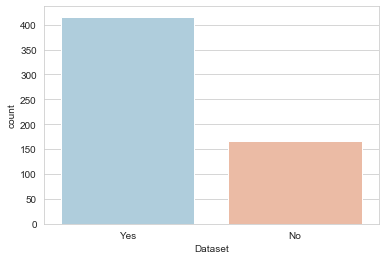

In [40]:
#Visualize the same distribution of output class
sn.set_style('whitegrid')
sn.countplot(x='Dataset',data=df,palette='RdBu_r')

Inference:
    Logistic Regression having high F1 score is a better model for the given problem statement. 